# Logistic Regression

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from patsy import dmatrices

import seaborn as sns
%matplotlib inline

### Basics of Logistic Regression

In [2]:
# read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv") 
df.groupby('rank').mean()
train_cols = df.columns[1:]

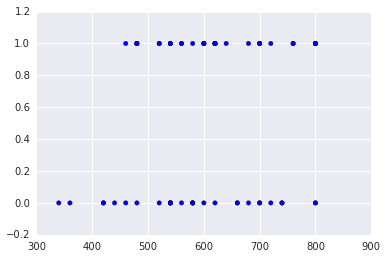

In [3]:
df1 = df[df['rank']==1]
df2 = df[df['rank']==2]
df3 = df[df['rank']==3]
df4 = df[df['rank']==4]
plt.scatter(df1['gre'],df1['admit'])

##### Logistic regression function

Logistic regression fits probability of the following form:
        $$\pi(x) = P(y=1\mid x) = \frac{e^{\alpha+\beta x}}{1+e^{\alpha+\beta x}}$$
        
This is a sigmoid function; when $x\rightarrow \infty$, then $\pi(x)\rightarrow 1$ and when $x\rightarrow -\infty$, then $\pi(x)\rightarrow 0$.

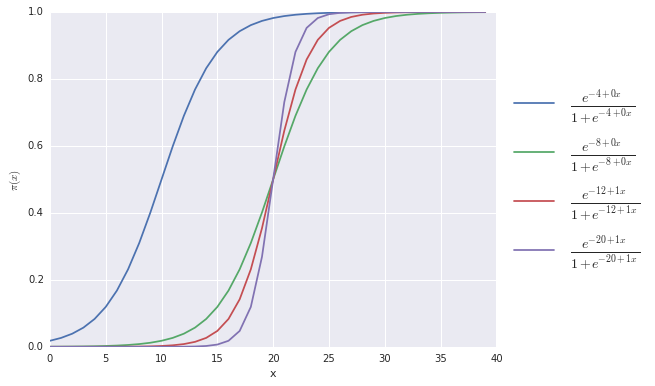

In [4]:
alphas = [-4, -8,-12,-20]
betas = [0.4,0.4,0.6,1]
x = np.arange(40)
fig = plt.figure(figsize=(8, 6)) 
ax = plt.subplot(111)

for i in range(len(alphas)):
    a = alphas[i]
    b = betas[i]
    y = np.exp(a+b*x)/(1+np.exp(a+b*x))
    plt.plot(x,y, label="$\\frac{e^{ %d + %.fx}}{1+e^{%d + %.fx}}$" %(a,b,a,b))
plt.xlabel('x')
plt.ylabel('$\pi(x)$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})


Parameter $\beta$ controls how fast $\pi(x)$ raises from $0$ to $1$

Parameter $\alpha$ shows the value of $x$ for which $\pi(x)=0.5$


##### Logodds

$$\pi(x) = \frac{e^{\alpha+\beta x}}{1+e^{\alpha+\beta x}}$$

$$1-\pi(x) = \frac{1}{1+e^{\alpha+\beta x}}$$

$$\frac{\pi(x)}{1-\pi(x)} = e^{\alpha+\beta x}$$

$$\text{logit}\left(\pi(x)\right)=\log\left(\frac{\pi(x)}{1-\pi(x)} \right) = \alpha + \beta x$$


For variable $y_i\in\{0,1\}$, the expected valye of $y_i$ given $x_i$ is $\text{logit}\left(\pi(x_i)\right)$

##### Logistic vs Linear regression

**Linear regression: ** $y_i = \alpha +\beta x_i$

$y_i$ comes from a normal distribution with standard deviation $\sigma$

$y_i=\alpha + \beta x_i$ is the linear predictor

**Logistic regression: ** The expected value of $E[y_i]$ *given* $x_i$ is $\pi_i=\pi(x_i)$ and $$\text{logit}\left(E[y_i]\right)=\text{logit}\left(\pi(x_i)\right)=\alpha + \beta x_i$$

$y_i\in\{0,1\}$ with $\text{Pr}(y_i=1)=\pi(x_i)$

#####  Logistic Regression Computation

**Input** pairs $(x_i,y_i)$

**Output** parameters $\widehat{\alpha}$ and $\widehat{\beta}$ that maximize the likelihood of the data given these parameters for the logistic regression model.

**Method** Maximum likelihood estimation

In [5]:
logit = sm.Logit(df['admit'], df[train_cols])
 
# fit the model
result = logit.fit() 

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


In [6]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Mar 2016   Pseudo R-squ.:                 0.06176
Time:                        08:57:55   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 1.971e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155        -0.001     0.004
gpa           -0.0042      0.201     -0.021      0.983        -0.398     0.390
rank          -0.6695      0.121     -5.527      0.0

Some more information on performing logistic regression using the statmodels package can be found here:

http://blog.yhathq.com/posts/logistic-regression-and-python.html

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()